In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [2]:
def lambert_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(8,8))
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
        m.drawcoastlines()
       
        m2      = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm2, ym2  = m2(LON, LAT)
        im2     = m2.plot(xm2,ym2,'.', color='k',linewidth=2.)

        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

In [3]:
def investigate_traj(figsize, proj, nb_traj, hfacc_level):
    
    import matplotlib.pyplot as plt
    import numpy as np
    from mpl_toolkits.basemap import Basemap
    import cmocean
    
    fig     = plt.figure(figsize=figsize)
    
    if proj=='ortho':
        m       = Basemap(projection='ortho', lat_0=-90, lon_0=0, resolution="l")
    elif proj=='merc':
        m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    elif proj=='lamb':
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-60.,rsphere=(6378137.00,6356752.3142),resolution='l',area_thresh=1000.,projection='lcc',lat_1=65.,lon_0=180.)
            
    # Plot the continents thanks to hFacC==0, choose the level : 0=surf, 9=30m
    xm, ym  = m(Xf, Yf)
    im      = m.contourf(xm, ym, hFacC[hfacc_level,...], extend='both', cmap='Greys_r')
    
    # Plot the salinity
    #xm, ym  = m(XC, YC)
    #im      = m.contourf(xm, ym, mean_Salt_30, levels=np.linspace(32.8,35.3,50), extend='both', cmap=cmocean.cm.haline)
    #cbar    = m.colorbar(im,pad='10%')
    #cbar.set_label('Salinity', fontsize =16)
    
    # Plot the stream function
    xm, ym  = m(XC, YC)
    cs      = m.contour(xm, ym, SF, extend='both', levels=np.linspace(np.nanmin(SF), np.nanmax(SF), 10), colors='k', linewidth=0.3)
    plt.clabel(cs, inline=True, fontsize=8)
    
    # Plot the southern front
    xm, ym  = m(XC, YC)
    im      = m.contour(xm, ym, southern_front)
    
    # Plot all the traj
    for p in nb_traj: 
        xm, ym  = m(LON[:,p], LAT[:,p])
        im      = m.plot(xm, ym, '-', color='orange',linewidth=0.4)
        xm, ym  = m(LON[0,p], LAT[0,p])
        im      = m.plot(xm, ym, '.', color='b',linewidth=2.)
        xm, ym  = m(LON[-1,p], LAT[-1,p])
        im      = m.plot(xm, ym, '*', color='r',linewidth=3.)
        xm, ym  = m(LON[154,p], LAT[154,p])
        im      = m.plot(xm, ym, '*', color='m',linewidth=3.)
        
    # Plot the southern front
    xm, ym  = m(XC, YC)
    im      = m.contour(xm, ym, southern_front)
        
    m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(120.,280.,10), labels=[0, 0, 0, 1])
    #plt.title('10 000 parti, 5 years (hFacC and S at 30 m)', fontsize=18)
    #plt.savefig(path_save + title_save, bbox_inches='tight')

In [4]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [5]:
# Mercator salinity
mean_Salt_surf = pickle_load('mean_Salt_surf_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_30     = pickle_load('mean_Salt_30_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_100   = pickle_load('mean_Salt_100_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_200   = pickle_load('mean_Salt_200_2', '/data/ebent/Bigger_domain/', verbose=False)
mean_Salt_500   = pickle_load('mean_Salt_500_2', '/data/ebent/Bigger_domain/', verbose=False)

# Mercator temperature
mean_Theta_surf = pickle_load('mean_Theta_surf_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_30     = pickle_load('mean_Theta_30_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_100   = pickle_load('mean_Theta_100_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_200   = pickle_load('mean_Theta_200_2', '/data/ebent/Bigger_domain', verbose=False)
mean_Theta_500   = pickle_load('mean_Theta_500_2', '/data/ebent/Bigger_domain', verbose=False)

In [6]:
SF = pickle_load('SF_2', '/data/ebent/', verbose=False)

In [7]:
# Load files
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

In [8]:
# This is hFacC for the SOUTHERN HEMISPHERE

file_h = h5py.File(load_path3 + 'grid.mat','r')

hFacC = file_h.get('hFacC')
hFacC = np.array(hFacC)
Xf = file_h.get('XC')
Xf = np.array(Xf)
Yf = file_h.get('YC')
Yf = np.array(Yf)

In [9]:
# On selectionne la bonne taille de hFacC == taille de "bigger domain"
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04
XC, YC    = np.meshgrid(XC, YC)

hfacc = hFacC[:, lat_min:lat_max, lon_min:lon_max]

In [10]:
southern_front = pickle_load('ACC_southern_front', '/data/ebent/', verbose=False)
southern_front = np.ma.masked_array(southern_front, mask=False)

In [11]:
W_boundary = 12 # 121,04 degrees
E_boundary = 1560 # 250,04 degrees

In [12]:
# Create a meshgrid to plot in index coordinates
xc = np.arange(1801)
yc = np.arange(1024)
xc, yc = np.meshgrid(xc,yc)

In [13]:
npts = 10000

***

# Load variables

In [14]:
path = '/data/ebent/Octopus/output/50m_line_RG/'

In [102]:
NPP = 'NPP08'

In [103]:
DEP = pickle_load(NPP + '_DEP', path)
LAT = pickle_load(NPP + '_LAT', path)
LON = pickle_load(NPP + '_LON', path)

zround = pickle_load(NPP + '_zround', path)
yround = pickle_load(NPP + '_yround', path)
xround = pickle_load(NPP + '_xround', path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_DEP.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_LAT.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_LON.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_zround.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_yround.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_xround.npy')


In [316]:
Z1 = pickle_load(NPP + '_Z1', path)
Z2 = pickle_load(NPP + '_Z2', path)
Z3 = pickle_load(NPP + '_Z3', path)
Z4 = pickle_load(NPP + '_Z4', path)
Z5 = pickle_load(NPP + '_Z5', path)
dead = pickle_load(NPP + '_dead', path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_Z1.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_Z2.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_Z3.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_Z4.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_Z5.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_dead.npy')


In [317]:
dead = dead-dead[0]

Particles that need threshold

***

# Plots

In [14]:
path = '/data/ebent/Octopus/output/50m_line_RG/'

In [96]:
Ind_parti_north = pickle_load('Ind_parti_north', path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/Ind_parti_north.npy')


In [97]:
import itertools
all_ind = []
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for NPP in npp:
    all_ind.append(Ind_parti_north[NPP])
    
ind_parti_north = list(itertools.chain(*all_ind))

Used NPP01 for these two plots

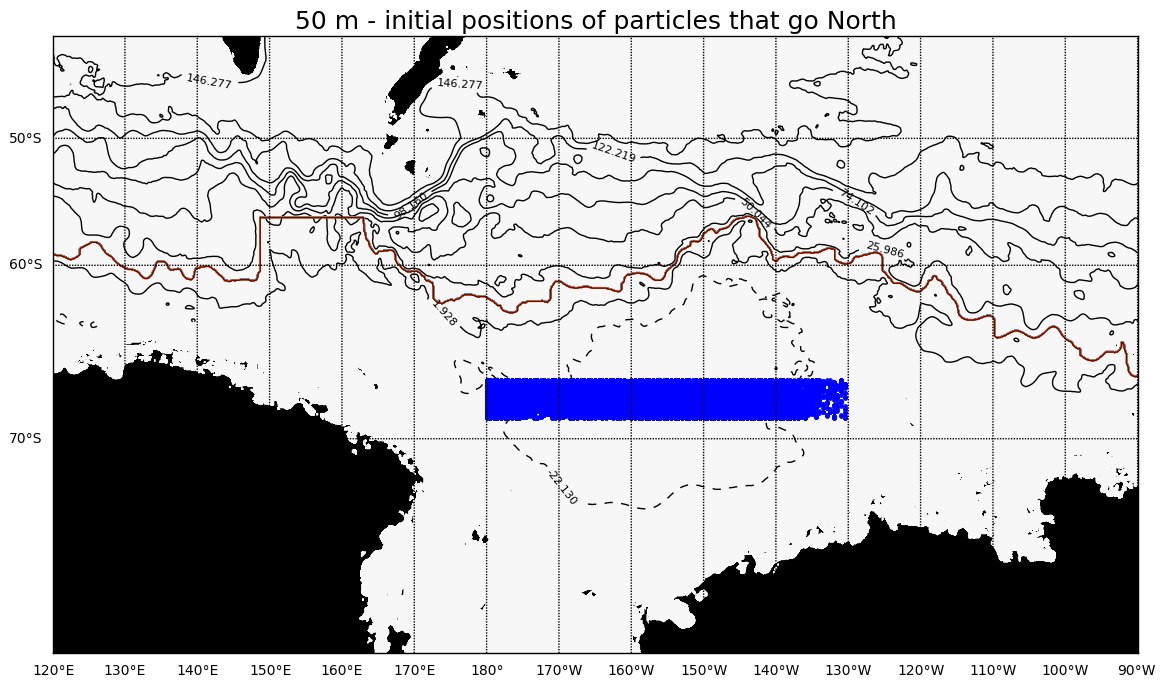

In [114]:
# Initial pos of particles that go north
investigate_traj(figsize=(14,10), proj='merc', nb_traj=ind_parti_north, hfacc_level=44)
plt.title('50 m - initial positions of particles that go North', fontsize=18)

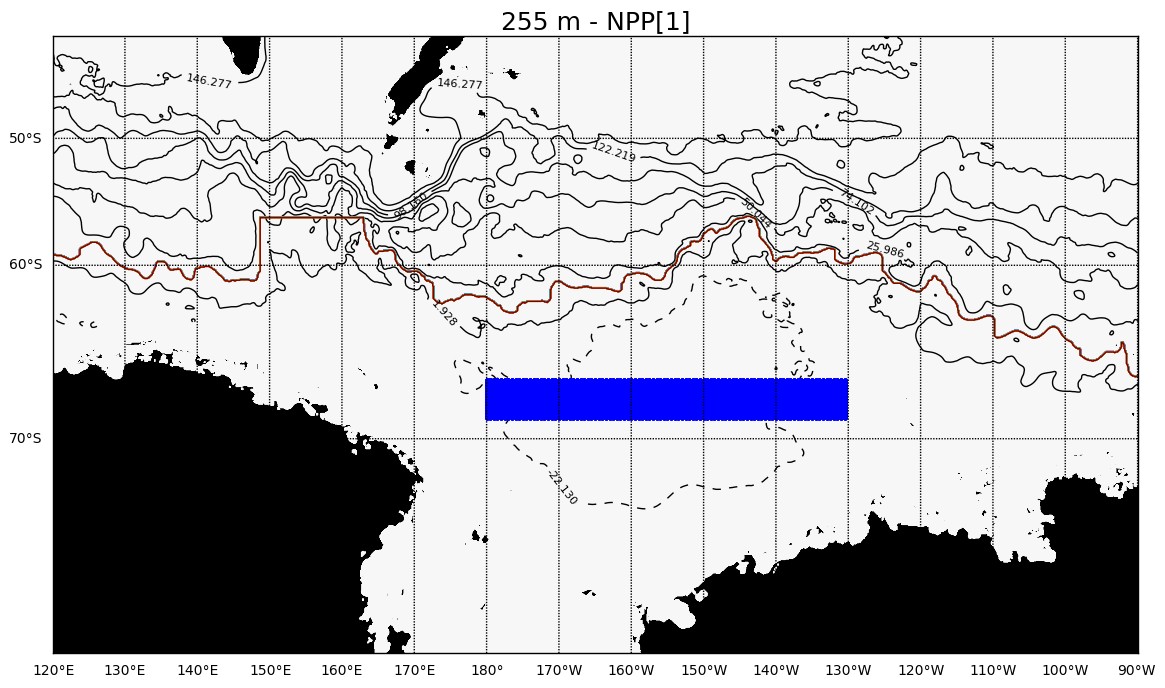

In [260]:
# Initial positions of all particles
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(10000), hfacc_level=44)
plt.title('50 m - initial pos', fontsize=18)

***

# Plot of the traj of the experiment 

Plot of all the parti

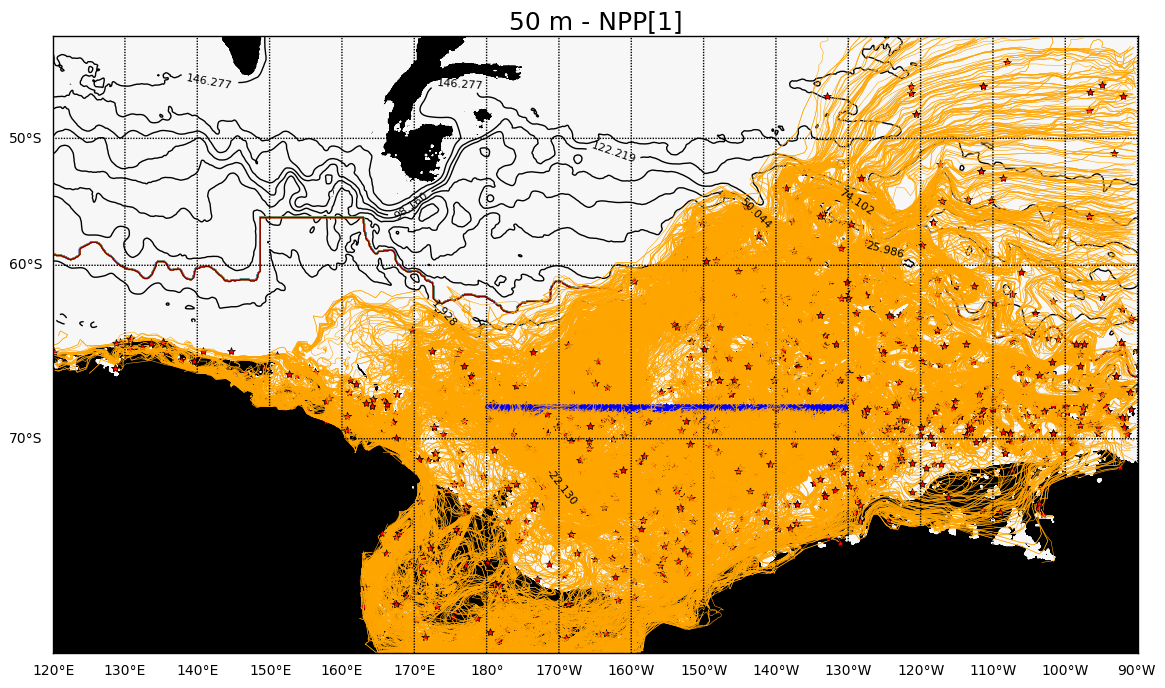

In [120]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(3000), hfacc_level=65)
plt.title('50 m - NPP[1]', fontsize=18)

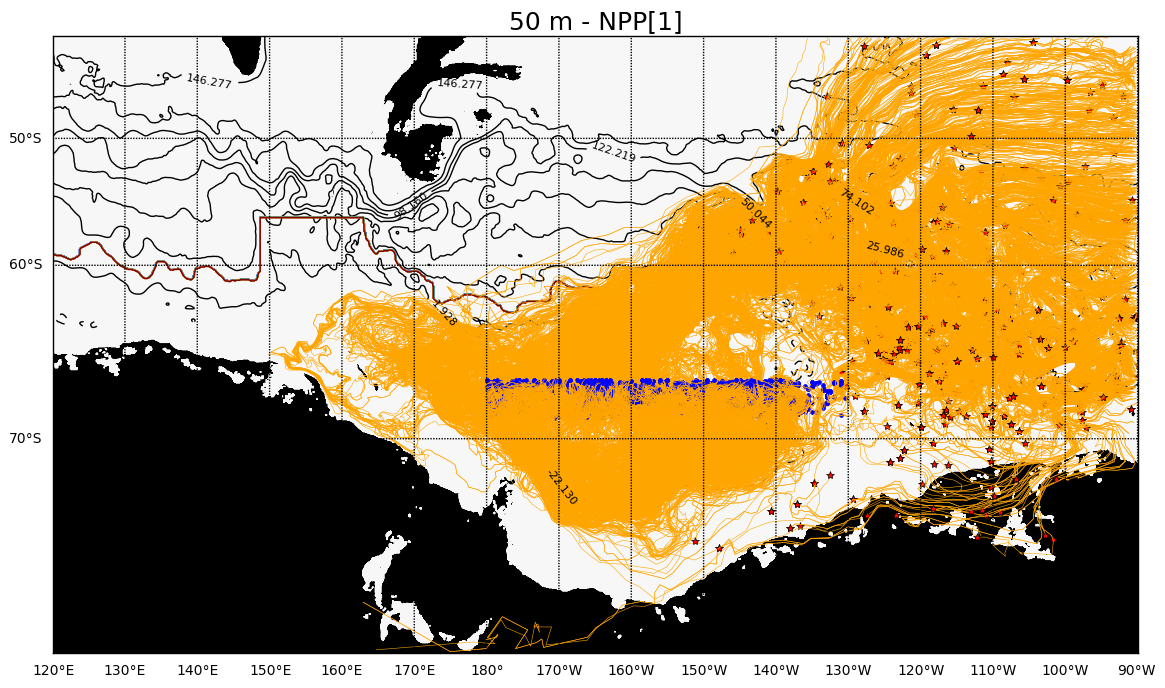

In [121]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=Ind_parti_north['01'], hfacc_level=65)
plt.title('50 m - NPP[1]', fontsize=18)

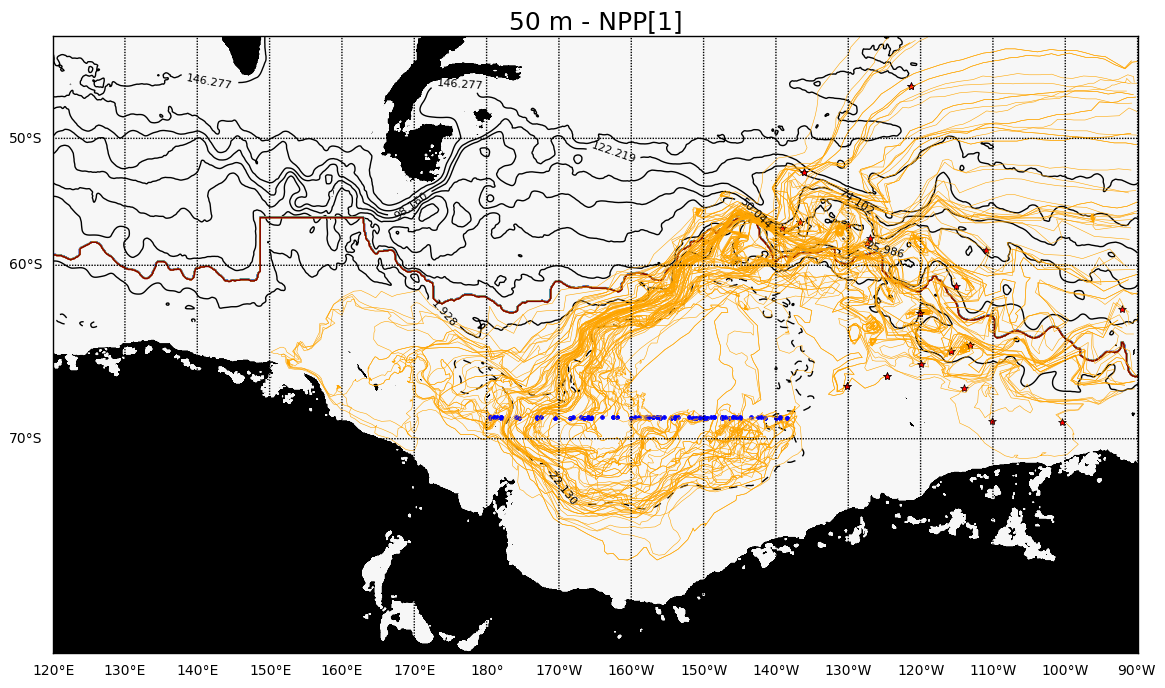

In [124]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=Ind_parti_north['01'][:100], hfacc_level=65)
plt.title('50 m - NPP[1]', fontsize=18)

In [ ]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(3000,6000), hfacc_level=65)
plt.title('50 m - NPP[1]', fontsize=18)

In [ ]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(6000,8000), hfacc_level=65)
plt.title('50 m - NPP[1]', fontsize=18)

In [ ]:
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(8000,10000), hfacc_level=65)
plt.title('50 m - NPP[1]', fontsize=18)

In [ ]:
# Particle that goes east and passes north at one point
investigate_traj(figsize=(14,10), proj='merc', nb_traj=range(7798, 7799), hfacc_level=65)
plt.title('50 m - NPP[1]', fontsize=18)

***

# Count the particles in each zone

In [43]:
are_alive = []

for p in range(10000):
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask
    
    parti_are_dead = np.squeeze(np.array(np.ma.where(xround.mask[:,p]==False)))
    if parti_are_dead.size>0.:
        are_alive.append(p)

In [44]:
len(are_alive)

6930

In [15]:
def count_in_zones(NPP, xround, yround, zround):
    to_east = []
    to_west = []
    to_north = []
    in_RG = []
    to_west_east = []
    are_dead = []
    
    for p in range(10000):
        south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
        south_front.mask = xround[:,p].mask
        
        north_outside_RG = np.squeeze(np.array(np.ma.where(south_front==0))) # don't forget to use np.ma when dealing with masks
        west_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]<=W_boundary))) 
        east_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]>=E_boundary)))
        parti_are_dead = np.squeeze(np.array(np.ma.where(xround.mask[:,p]==False)))
        
        if north_outside_RG.size==0. and west_outside_RG.size==0. and east_outside_RG.size==0. and parti_are_dead.size>0.:
            in_RG.append(p)
        if north_outside_RG.size>0. and parti_are_dead.size>0.:
            to_north.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size>0. and east_outside_RG.size==0. and parti_are_dead.size>0.:
            to_west.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size==0. and east_outside_RG.size>0. and parti_are_dead.size>0.:
            to_east.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size>0. and east_outside_RG.size>0. and parti_are_dead.size>0.:
            to_west_east.append(p)
        if parti_are_dead.size==0.:
            are_dead.append(p)
            
    print ''
    print 'NPP' + NPP + ' :'
    print ''
    print 'Particles that stay in the Ross Gyre :', len(in_RG)
    print 'Particles that go North :', len(to_north)
    print 'Particles that go West :', len(to_west)
    print 'Particles that go East :', len(to_east)
    print 'Particles that go East then West :', len(to_west_east)
    print 'Particles that are masked :', len(are_dead)
    print 'Total number of particles not dead :', len(in_RG)+len(to_north)+len(to_west)+len(to_east)+len(to_west_east)
    
    return in_RG, to_east, to_north, to_west, to_west_east, are_dead

In [104]:
in_RG, to_east, to_north, to_west, to_west_east = count_in_zones('08', xround, yround, zround)


NPP08 :

Particles that stay in the Ross Gyre : 6483
Particles that go North : 2094
Particles that go West : 53
Particles that go East : 1370
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000


In [32]:
Ensembles['08']['Z2'][-1]

2052.0

# Particle analysis : count the particles according to time

In [107]:
Z1[0], Z2[0], Z3[0], Z4[0], Z5[0], dead[0]

(9900.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [108]:
Z1[-1], Z2[-1], Z3[-1], Z4[-1], Z5[-1], dead[-1]

(933.0, 2.0, 1.0, 0.0, 0.0, 6.0)

# This is what I've been doing and I believe is wrong...

In [14]:
NPP = 'NPP08'

In [17]:
DEP = pickle_load(NPP + '_DEP', path)
LAT = pickle_load(NPP + '_LAT', path)
LON = pickle_load(NPP + '_LON', path)

zround = pickle_load(NPP + '_zround', path)
yround = pickle_load(NPP + '_yround', path)
xround = pickle_load(NPP + '_xround', path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_DEP.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_LAT.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_LON.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_zround.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_yround.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/NPP08_xround.npy')


In [166]:
are_alive = []

for p in range(10000):
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask
    
    parti_are_dead = np.squeeze(np.array(np.ma.where(xround.mask[:,p]==False)))
    if parti_are_dead.size>0.:
        are_alive.append(p)

In [167]:
len(are_alive)

9900

Ici je compte dans dead que les parti de la RG

In [194]:
Z1 = np.zeros(xround.shape[0])
Z2 = np.zeros(xround.shape[0])
Z3 = np.zeros(xround.shape[0])
Z4 = np.zeros(xround.shape[0])
Z5 = np.zeros(xround.shape[0])
dead = np.zeros(xround.shape[0])

for p in range(npts): #10000: #range(npts)
    south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
    south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
    #print ''
    #print 'nb of parti :', p
    for t in range(xround.shape[0]):
        if south_front[t]!=0 and xround[t,p]>W_boundary and xround[t,p]<E_boundary:
            #print t, 'in RG'
            Z1[t]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], Z5[t], dead[t]
        
        elif south_front[t]==0:
            #print t, 'north'
            Z2[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], Z5[t], dead[t]
            break # after the break, the particle is considered forever in the zone
        elif xround[t,p]<=W_boundary:
            #print t,'out to the west'
            Z3[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], Z5[t], dead[t]
            break
        elif xround[t,p]>=E_boundary:
            #print 'east : ', p, t
            #print t, 'east'
            Z4[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], Z5[t], dead[t]
            break
        elif xround[t,p]<=W_boundary and xround[t,p]>=E_boundary:
            #print t, 'east and west'
            Z5[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], Z5[t], dead[t]
            break
            
        #elif xround.mask[t,p]==True:
        elif south_front[t-1]!=0 and xround[t-1,p]>W_boundary and xround[t-1,p]<E_boundary and xround.mask[t,p]==True:
            #print p, t
            #print t, 'parti is dead !'
            #print 'dead : ', p, t
            dead[t:]+=1
            #print Z1[t], Z2[t], Z3[t], Z4[t], Z5[t], dead[t]
            #print Z1[t-1], Z2[t-1], Z3[t-1], Z4[t-1], Z5[t-1], dead[t-1]
            break
        ##print Z1[t], Z2[t], Z3[t], Z4[t], Z5[t], dead[t]
        
        

In [176]:
Z1[0], Z2[0], Z3[0], Z4[0], Z5[0], dead[0]

(9900.0, 0.0, 0.0, 0.0, 0.0, 0.0)

In [177]:
Z1[-1], Z2[-1], Z3[-1], Z4[-1], Z5[-1], dead[-1]

(958.0, 280.0, 1623.0, 48.0, 0.0, 6991.0)

Verifie si les parti sont conservatives : à chaque pas de temps, la somme de chaque zone = le nb total de parti

In [29]:
print 'check at t = 0 :', Z1[0]+Z2[0]+Z3[0]+Z4[0]+Z5[0]+dead[0]
print 'check at t = end :', Z1[-1]+Z2[-1]+Z3[-1]+Z4[-1]+Z5[-1]+dead[-1]
print 'check at t = 44 :', Z1[44]+Z2[44]+Z3[44]+Z4[44]+Z5[44]+dead[44]
print 'check at t = 100 :', Z1[100]+Z2[100]+Z3[100]+Z4[100]+Z5[100]+dead[100]

check at t = 0 : 6930.0
check at t = end : 6930.0
check at t = 44 : 6930.0
check at t = 100 : 6930.0


***

# Plot the particle analysis

With dictionary

In [17]:
def plot_1NPP(npts, title, dictionary_of_zones):
    
    import matplotlib.pyplot as plt
    import numpy as np
    fig  = plt.figure()
    time = (np.arange(np.int_(dictionary_of_zones['Z1'].shape))*10)/360. #(np.arange(148)*10)/360. #(np.arange(np.int_(Z1.shape))*10)/360.
    
    ax1 = fig.add_subplot(2,1,1)
    plt.subplot(2,1,1)
    ax1.plot(time, dictionary_of_zones['Z1'] *100./npts, '-y', label='Ross Sea')
    
    ax1.legend(bbox_to_anchor=(1.04,0.5), loc='center left', fontsize=9)
    plt.xlabel('Time [years]')
    ax1.set_ylabel('Particles [%]')
    
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(time, dictionary_of_zones['Z2'] *100./npts, '-r', label='North of ACC front')
    ax2.plot(time, dictionary_of_zones['Z4'] *100./npts, '-b', label='East')
    #ax2.plot(time, dictionary_of_zones['Z5'] *100./npts, '-c', label='East and West')
    ax2.plot(time, dictionary_of_zones['dead'] *100./npts, '-k', label='Hit land in Ross Sea')
    ax2.plot(time, dictionary_of_zones['Z3'] *100./npts, '-g', label='West')

    ax2.legend(bbox_to_anchor=(1.04,0.5), loc='center left', fontsize=9)
    ax2.set_xlabel('Time [years]')
    ax2.set_ylabel('Particles [%]')
    
    fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(bottom=0.6)
    fig.tight_layout()
    
    #print ''
    #print 'Total nb of particles that stay in the Ross Gyre :', Z1[-1]*100./npts, '%'
    #print 'Total nb of particles that go North :', Z2[-1]*100./npts, '%'
    #print 'Total nb of particles that go West :', Z3[-1]*100./npts, '%'
    #print 'Total nb of particles that go East :', Z4[-1]*100./npts, '%'
    #print 'Total nb of particles that go East then West :', Z5[-1]*100./npts, '%'
    #print 'Total nb of particles that die :', dead[-1]*100./npts, '%'
    #print 'Total number of particles :', Z1[-1]+Z2[-1]+Z3[-1]+Z4[-1]+Z5[-1]+dead[-1]

### Stores the indexes of zones in a dictionary (Ind_Ensembles) of dictionary (Ind_Zones)
* particles that stay in gyre 
* particles that go north 
* particles that go west
* particles that go east
* particles that are masked all time steps

In [305]:
max_time_experiment = 148
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Z = ['Z1','Z2','Z3','Z4','Z5','dead']
Index_Ensembles = {} 

for NPP in npp:
    Index_Zones = {}
    print 'NPP', NPP
    zround = pickle_load('NPP' + NPP + '_zround', Path, verbose=False)[:max_time_experiment]
    yround = pickle_load('NPP' + NPP + '_yround', Path, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', Path, verbose=False)[:max_time_experiment]

    Index_Zones['gyre'], Index_Zones['east'], Index_Zones['north'], Index_Zones['west'], Index_Zones['east_west'], Index_Zones['masked'] = count_in_zones(NPP, xround, yround, zround)
    Index_Ensembles[NPP] = Index_Zones

NPP 01

NPP01 :

Particles that stay in the Ross Gyre : 6703
Particles that go North : 2294
Particles that go West : 49
Particles that go East : 954
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000
NPP 02

NPP02 :

Particles that stay in the Ross Gyre : 6961
Particles that go North : 2133
Particles that go West : 50
Particles that go East : 856
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000
NPP 03

NPP03 :

Particles that stay in the Ross Gyre : 6830
Particles that go North : 2191
Particles that go West : 58
Particles that go East : 921
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000
NPP 04

NPP04 :

Particles that stay in the Ross Gyre : 6909
Particles that go North : 2085
Particles that go West : 68
Particles that go East : 938
Particles that go East then West : 0
Particles that are masked : 0
Total n

In [314]:
pickle_save('Index_Ensembles', Path, Index_Ensembles)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/Index_Ensembles.npy')


In [222]:
Index_Ensembles = pickle_load('Index_Ensembles', Path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/Index_Ensembles.npy')


### Function to count the parti in each zone according to time thanks to the indexes saved in dictionary Ind_Ensembles

In [283]:
ppath = '/data/ebent/Octopus/output/50m_line_RG/count_by_index/'

In [35]:
max_time_experiment = 148
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [323]:
def count_zones2(zone, name_var_zone):  
    npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

    for NPP in npp:        
        xround = pickle_load('NPP' + NPP + '_xround', Path, verbose=False)[:max_time_experiment]
        yround = pickle_load('NPP' + NPP + '_yround', Path, verbose=False)[:max_time_experiment]
        var_zone = np.zeros(xround.shape[0])
        dead = np.zeros(xround.shape[0])
        
        if zone == 'north':
            ind_particle = pickle_load('Ind_parti_north', thresh_path, verbose=False)[NPP]
        
        else:
            ind_particle = Index_Ensembles[NPP][zone]
        
        print NPP
        for p in ind_particle:
            south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
            south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
            
            
            if zone == 'gyre':
                for t in range(xround.shape[0]): 
                    if south_front[t]!=0 and xround.mask[t,p]==False:
                        var_zone[t]+=1
                    elif south_front[t-1]!=0 and xround.mask[t,p]==True:
                        dead[t:]+=1
                        break                      
            
            if zone == 'north':
                for t in range(xround.shape[0]): 
                    if south_front[t]==0:
                        var_zone[t:]+=1
                        break

            if zone == 'west':
                for t in range(xround.shape[0]): 
                    if xround[t,p]<=W_boundary:
                        var_zone[t:]+=1
                        break
            
            if zone == 'east':
                for t in range(xround.shape[0]): 
                    if xround[t,p]>=E_boundary:
                        var_zone[t:]+=1
                        break
                        
            if zone == 'east_west':
                for t in range(xround.shape[0]): 
                    if south_front[t]==0:
                        var_zone[t:]+=1
                        break
                          
        pickle_save('NPP' + NPP + '_' + name_var_zone, ppath, var_zone, verbose=False)
        
        if zone == 'gyre':
            pickle_save('NPP' + NPP + '_' + 'dead', ppath, dead, verbose=False)
    

In [246]:
Ind_parti_thresh_gyre = pickle_load('Ind_parti_thresh_gyre', thresh_path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_thresh_gyre.npy')


In [300]:
for NPP in npp:
    Index_Ensembles[NPP]['gyre'] = Index_Ensembles[NPP]['gyre'] + Ind_parti_thresh_gyre[NPP]
    print len(Index_Ensembles[NPP]['gyre'])

7596
7736
7619
7632
7705
7654
7747
7634
7710
7423
7624
7582


In [302]:
count_zones2('north', 'Z2')

yes norht
01
yes norht
02
yes norht
03
yes norht
04
yes norht
05
yes norht
06
yes norht
07
yes norht
08
yes norht
09
yes norht
10
yes norht
11
yes norht
12


In [285]:
count_zones2('gyre', 'Z1')

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
01
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
02
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
03
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
04
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
05
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
06
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
07
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
08
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
09
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
10


In [70]:
count_zones2('west', 'Z3')

01
02
03
04
05
06
07
08
09
10
11
12


In [66]:
count_zones2('east', 'Z4')

01
02
03
04
05
06
07
08
09
10
11
12


In [71]:
count_zones2('east_west', 'Z5')

01
02
03
04
05
06
07
08
09
10
11
12


In [ ]:
for NPP in npp:
    a = pickle_load('NPP' + NPP + '_' + 'Z1', ppath, verbose=False)
    b = pickle_load('NPP' + NPP + '_' + 'dead', ppath, verbose=False)
    print a[0], a[-1]
    print a+b

In [178]:
calc = []
for NPP in npp:
    a = pickle_load('NPP' + NPP + '_' + 'Z2', ppath, verbose=False)
    calc.append(a[-1])
    print a[0], a[-1]

0.0 2294.0
0.0 2133.0
0.0 2191.0
0.0 2085.0
0.0 2115.0
0.0 2127.0
0.0 1954.0
0.0 1923.0
0.0 1791.0
0.0 1803.0
0.0 1778.0
0.0 1814.0


In [68]:
for NPP in npp:
    a = pickle_load('NPP' + NPP + '_' + 'dead', ppath, verbose=False)
    print a[0], a[-1]

0.0 1379.0
0.0 1299.0
0.0 1174.0
0.0 1165.0
0.0 1228.0
0.0 1404.0
0.0 1399.0
0.0 1268.0
0.0 1223.0
0.0 1150.0
0.0 1075.0
0.0 1095.0


### Stores the calc of zones in a dictionary (Ensembles) of dictionary (Zones)
Can be used for either with index or without

In [304]:
path = '/data/ebent/Octopus/output/50m_line_RG/count_by_index/'

In [83]:
path = '/data/ebent/Octopus/output/50m_line_RG/'

In [319]:
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Z = ['Z1','Z2','Z3','Z4','Z5','dead']

max_time_experiment = 148 # 4 last years
n = 1
Ensembles = {}   

for NPP in npp:
    Zones = {}
    
    for zone in Z:
        Zones[zone] = pickle_load('NPP' + NPP + '_' + zone, path, verbose=False)[:max_time_experiment]
        
    #Zones['dead']= Zones['dead'] - Zones['dead'][0]
    Ensembles[NPP] = Zones

In [290]:
pickle_save('Ensembles', path, Ensembles)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/count_by_index/Ensembles.npy')


In [188]:
Ensembles = pickle_load('Ensembles', path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/test/Ensembles.npy')


### Calc dictionary (Sum_Zones) with sum over all NPPs of each zones
Can be used for either with index or without

In [306]:
Sum_Zones = {}

npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Z = ['Z1','Z2','Z3','Z4','Z5','dead']

for NPP in npp:
    for zone in Z:
        if NPP == '01':
            Sum_Zones[zone] = Ensembles[NPP][zone].copy()
        else:
            Sum_Zones[zone] += Ensembles[NPP][zone]

#### Necessary as Z1 with calc in index only calculated for parti ALWAYS in ross sea, so use this trick

In [307]:
in_RG_dbt = 120000-Sum_Zones['Z1'][0]

In [308]:
Sum_Zones['Z1'] = Sum_Zones['Z1']+in_RG_dbt-(Sum_Zones['Z2']+Sum_Zones['Z3']+Sum_Zones['Z4']+Sum_Zones['Z5'])

In [309]:
Sum_Zones['Z1'][0]

120000.0

In [295]:
pickle_save('Sum_Zones', path, Sum_Zones)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/count_by_index/Sum_Zones.npy')


In [196]:
path = '/data/ebent/Octopus/output/50m_line_RG/test/'

In [203]:
Sum_Zones = pickle_load('Sum_Zones', path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/count_by_index/Sum_Zones.npy')


In [205]:
len(Index_Ensembles['01']['north'])

2294

In [276]:
len(Index_Ensembles['01']['north'])

2294

In [279]:
len(Ind_parti_north['01'])

1404

In [313]:
np.int_(np.array(Ensembles['02']['Z1']))

array([1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359,
       1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359, 1359,
       1359, 1359, 1359, 1358, 1358, 1358, 1358, 1358, 1358, 1356, 1356,
       1356, 1356, 1354, 1352, 1350, 1345, 1345, 1342, 1338, 1339, 1339,
       1338, 1343, 1338, 1338, 1338, 1326, 1318, 1310, 1297, 1289, 1281,
       1281, 1280, 1280, 1286, 1281, 1266, 1261, 1257, 1259, 1256, 1255,
       1248, 1246, 1244, 1238, 1232, 1230, 1229, 1226, 1222, 1217, 1209,
       1204, 1201, 1189, 1166, 1140, 1114, 1095, 1069, 1048, 1028,  994,
        959,  919,  899,  869,  831,  804,  781,  741,  717,  695,  666,
        666,  633,  615,  589,  562,  556,  541,  513,  495,  477,  463,
        457,  439,  423,  414,  390,  393,  376,  374,  362,  349,  329,
        313,  308,  295,  283,  272,  278,  277,  265,  251,  234,  231,
        233,  225,  218,  223,  199,  188,  184,  182,  176,  157,  154,
        159,  158,  149,  147,  137])

In [318]:
Sum_Zones['dead'][-1]

764.0

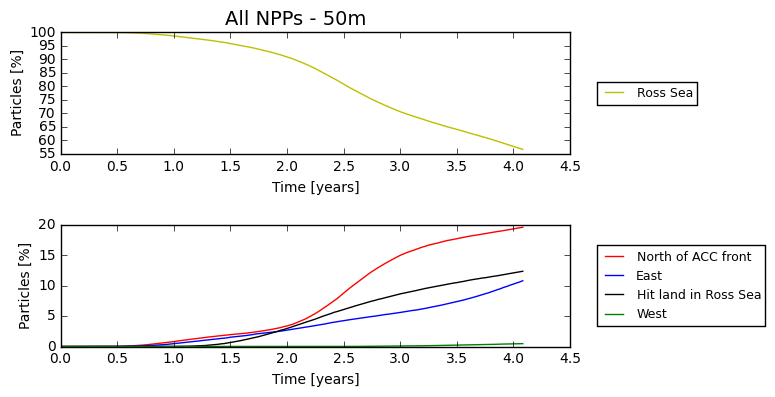

In [186]:
plot_1NPP(npts = Sum_Zones['Z1'][0], title = 'All NPPs - 50m', dictionary_of_zones=Sum_Zones)

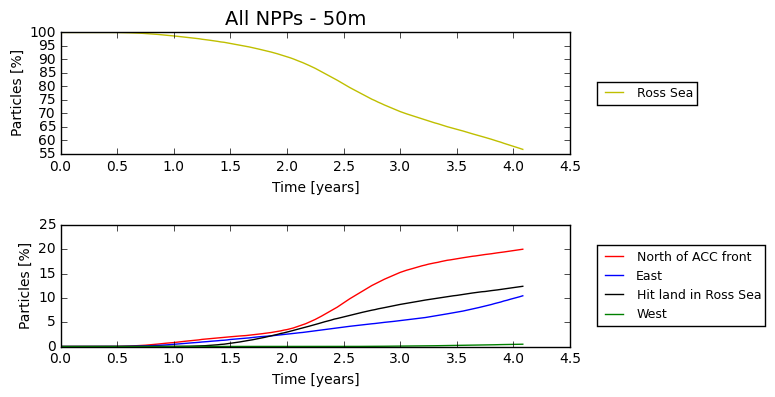

In [201]:
plot_1NPP(npts = Sum_Zones['Z1'][0], title = 'All NPPs - 50m', dictionary_of_zones=Sum_Zones)

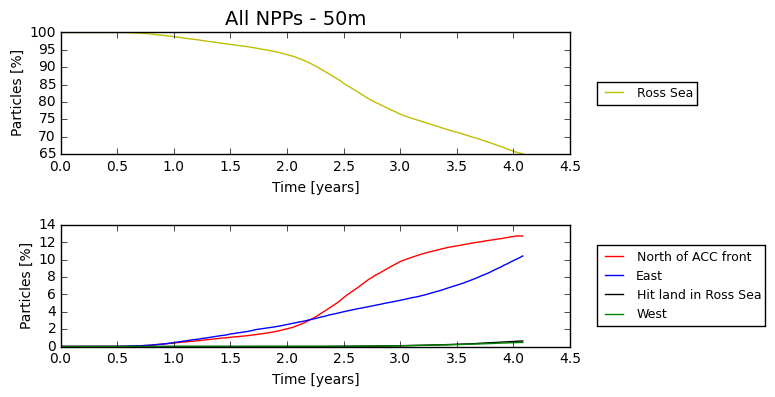

In [322]:
plot_1NPP(npts = Sum_Zones['Z1'][0], title = 'All NPPs - 50m', dictionary_of_zones=Sum_Zones)

In [182]:
print Sum_Zones['Z1'][0]
print Sum_Zones['Z1'][-1]
print Sum_Zones['Z2'][-1]
print Sum_Zones['Z3'][-1]
print Sum_Zones['Z4'][-1]
print Sum_Zones['Z5'][-1]
print Sum_Zones['dead'][-1]

120000.0
68054.0
23545.0
563.0
12979.0
0.0
14859.0


test

In [198]:
print Sum_Zones['Z1'][0]
print Sum_Zones['Z1'][-1]
print Sum_Zones['Z2'][-1]
print Sum_Zones['Z3'][-1]
print Sum_Zones['Z4'][-1]
print Sum_Zones['Z5'][-1]
print Sum_Zones['dead'][-1]

120000.0
68054.0
24008.0
563.0
12516.0
0.0
14859.0


In [200]:
t = 77
print Sum_Zones['Z1'][t]+Sum_Zones['Z2'][t]+Sum_Zones['Z3'][t]+Sum_Zones['Z4'][t]+Sum_Zones['Z5'][t]+Sum_Zones['dead'][t]

120000.0


In [128]:
t = 147
print Sum_Zones['Z1'][t]
print Sum_Zones['Z1'][t]+Sum_Zones['Z2'][t]+Sum_Zones['Z3'][t]+Sum_Zones['Z4'][t]+Sum_Zones['Z5'][t]+Sum_Zones['dead'][t]

68054.0
120000.0


In [149]:
t = -1
print Sum_Zones['Z1'][t]
print Sum_Zones['Z2'][t]
print Sum_Zones['Z3'][t]
print Sum_Zones['Z4'][t]
print Sum_Zones['Z5'][t]
print Sum_Zones['dead'][t]

68054.0
24008.0
563.0
12516.0
0.0
14859.0


***

## Make figure with several NPP

In [ ]:
fig = plt.figure(figsize=(14,14))
i = 1
for NPP in NPPs:
    evo_zone1 = pickle_load(NPP + '_evo_zone1', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone2 = pickle_load(NPP + '_evo_zone2', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone3 = pickle_load(NPP + '_evo_zone3', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone4 = pickle_load(NPP + '_evo_zone4', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    evo_zone5 = pickle_load(NPP + '_evo_zone5', '/data/ebent/Particle_analysis/' + folder, verbose=False)
    total = np.ones(evo_zone2.shape[0])*10000
    total = total-evo_zone2-evo_zone3-evo_zone4-evo_zone5
    
    plt.subplot(4,3,i)
    plot1(NPP)
    i+=1
fig.tight_layout

***

# Histograms

In [189]:
Path = '/data/ebent/Octopus/output/50m_line_RG/'

In [190]:
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
max_time_experiment = 148

In [207]:
thresh_path = '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/'

### Without threshold

In [200]:
# Loop to save the p indexes of particles that go north thanks to function count_in_zones

max_time_experiment = 148
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Ind_parti_north = {}

for NPP in npp:
    print 'NPP', NPP
    zround = pickle_load('NPP' + NPP + '_zround', Path, verbose=False)[:max_time_experiment]
    yround = pickle_load('NPP' + NPP + '_yround', Path, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', Path, verbose=False)[:max_time_experiment]

    in_RG, to_east, to_north, to_west, to_west_east = count_in_zones(NPP, xround, yround, zround)

    Ind_parti_north[NPP] = to_north
    
pickle_save('Ind_parti_north', thresh_path, Ind_parti_north)

NPP 01

NPP01 :

Particles that stay in the Ross Gyre : 6703
Particles that go North : 2294
Particles that go West : 49
Particles that go East : 954
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000
NPP 02

NPP02 :

Particles that stay in the Ross Gyre : 6961
Particles that go North : 2133
Particles that go West : 50
Particles that go East : 856
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000
NPP 03

NPP03 :

Particles that stay in the Ross Gyre : 6830
Particles that go North : 2191
Particles that go West : 58
Particles that go East : 921
Particles that go East then West : 0
Particles that are masked : 0
Total number of particles not dead : 10000
NPP 04

NPP04 :

Particles that stay in the Ross Gyre : 6909
Particles that go North : 2085
Particles that go West : 68
Particles that go East : 938
Particles that go East then West : 0
Particles that are masked : 0
Total n

### With threshold

In [229]:
def thresh(to_north):
    thresh_in_gyre = []
    thresh_to_north = []
    for p in to_north:
        #print p
        south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
        south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
        
        where_north = np.squeeze(np.where(south_front==0))
        if where_north.size>2 and where_north[1]==where_north[0]+1 and where_north[2]==where_north[1]+1:
            thresh_to_north.append(p)
        
        else:
            thresh_in_gyre.append(p)
        #print 'nb of parti :', p#, where_north
    return thresh_to_north, thresh_in_gyre

In [234]:
# Loop to save the p indexes of particles that go north thanks to function count_in_zones

max_time_experiment = 148
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Ind_parti_north = {}
Ind_parti_thresh_gyre = {}

for NPP in npp:

    zround = pickle_load('NPP' + NPP + '_zround', Path, verbose=False)[:max_time_experiment]
    yround = pickle_load('NPP' + NPP + '_yround', Path, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', Path, verbose=False)[:max_time_experiment]

    to_north = Index_Ensembles[NPP]['north']
    
    thresh_to_north, thresh_in_gyre = thresh(to_north)
    
    Ind_parti_north[NPP] = thresh_to_north
    Ind_parti_thresh_gyre[NPP] = thresh_in_gyre
    
    print ''
    print 'Particles that go North with threshold :', len(thresh_to_north)
    print 'Particles that stay in gyre with threshold :', len(thresh_in_gyre)
    print 'Sum : ', len(thresh_to_north)+len(thresh_in_gyre)
    
pickle_save('Ind_parti_north', thresh_path, Ind_parti_north)
pickle_save('Ind_parti_thresh_gyre', thresh_path, Ind_parti_thresh_gyre)


Particles that go North with threshold : 1404
Particles that stay in gyre with threshold : 890
Sum :  2294

Particles that go North with threshold : 1359
Particles that stay in gyre with threshold : 774
Sum :  2133

Particles that go North with threshold : 1403
Particles that stay in gyre with threshold : 788
Sum :  2191

Particles that go North with threshold : 1363
Particles that stay in gyre with threshold : 722
Sum :  2085

Particles that go North with threshold : 1301
Particles that stay in gyre with threshold : 814
Sum :  2115

Particles that go North with threshold : 1407
Particles that stay in gyre with threshold : 720
Sum :  2127

Particles that go North with threshold : 1273
Particles that stay in gyre with threshold : 681
Sum :  1954

Particles that go North with threshold : 1203
Particles that stay in gyre with threshold : 720
Sum :  1923

Particles that go North with threshold : 1173
Particles that stay in gyre with threshold : 618
Sum :  1791

Particles that go North wit

Change the save path depending on threshold or not

In [209]:
# Loop to save the t indexes of particles that go north thanks to index of p we selected above, use of southern_front

max_time_experiment = 148
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
T_step_parti_north = {}

for NPP in npp:
    yround = pickle_load('NPP' + NPP + '_yround', Path, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', Path, verbose=False)[:max_time_experiment]

    t_to_north = []
    
    for i in range(len(Ind_parti_north[NPP])):
        #print i
        tmp = np.squeeze(np.array(np.ma.where(southern_front[yround[:,Ind_parti_north[NPP][i]], xround[:,Ind_parti_north[NPP][i]]]==0)))
        if tmp.size == 1:
            t_to_north.append(np.int_(tmp))
        else:
            t_to_north.append(tmp[0])
                                  
    T_step_parti_north[NPP] = t_to_north
    #print T_step_parti_north[NPP]

pickle_save('T_step_parti_north', thresh_path, T_step_parti_north)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/T_step_parti_north.npy')


# With threshold 

In [208]:
Ind_parti_north = pickle_load('Ind_parti_north', thresh_path)
T_step_parti_north = pickle_load('T_step_parti_north', thresh_path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/Ind_parti_north.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/thresh_analysis/T_step_parti_north.npy')


In [217]:
# Check if lists containing indexes p and t have same length = nb of parti that go north
list_p_thresh = []
list_t_thresh = []

for NPP in npp:
    list_p_thresh.append(len(Ind_parti_north[NPP]))
    list_t_thresh.append(len(T_step_parti_north[NPP]))
    print len(T_step_parti_north[NPP]), len(Ind_parti_north[NPP])

1404 1404
1359 1359
1403 1403
1363 1363
1301 1301
1407 1407
1273 1273
1203 1203
1173 1173
1168 1168
1078 1078
1141 1141


In [242]:
import itertools

In [ ]:
# Make one list with all depths, longitudes, times of crossing for all NPPs

DEP_cross = []
LON_cross = []
TIME_cross = []
for NPP in npp:
    #print 'NPP', NPP
    DEP = pickle_load('NPP' + NPP + '_DEP', Path, verbose=False)[:max_time_experiment]
    DEP_cross.append(DEP[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    LON = pickle_load('NPP' + NPP + '_LON', Path, verbose=False)[:max_time_experiment]
    LON_cross.append(LON[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    TIME_cross.append(T_step_parti_north[NPP])
   
DEP_cross = list(itertools.chain(*DEP_cross))
LON_cross = list(itertools.chain(*LON_cross))
TIME_cross = list(itertools.chain(*TIME_cross))

# Without threshold 

In [212]:
Ind_parti_north = pickle_load('Ind_parti_north', Path)
T_step_parti_north = pickle_load('T_step_parti_north', Path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/Ind_parti_north.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/T_step_parti_north.npy')


In [219]:
# Check if lists containing indexes p and t have same length = nb of parti that go north
list_p = []
list_t = []
for NPP in npp:
    list_p.append(len(Ind_parti_north[NPP]))
    list_t.append(len(T_step_parti_north[NPP]))
    print len(T_step_parti_north[NPP]), len(Ind_parti_north[NPP])

2294 2294
2133 2133
2191 2191
2085 2085
2115 2115
2127 2127
1954 1954
1923 1923
1791 1791
1803 1803
1778 1778
1814 1814


In [221]:
np.array(list_p) - np.array(list_p_thresh)

array([890, 774, 788, 722, 814, 720, 681, 720, 618, 635, 700, 673])

In [222]:
np.array(list_t) - np.array(list_t_thresh)

array([890, 774, 788, 722, 814, 720, 681, 720, 618, 635, 700, 673])

In [242]:
import itertools

In [290]:
# Make one list with all depths, longitudes, times of crossing for all NPPs

DEP_cross = []
LON_cross = []
TIME_cross = []
for NPP in npp:
    #print 'NPP', NPP
    DEP = pickle_load('NPP' + NPP + '_DEP', Path, verbose=False)[:max_time_experiment]
    DEP_cross.append(DEP[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    LON = pickle_load('NPP' + NPP + '_LON', Path, verbose=False)[:max_time_experiment]
    LON_cross.append(LON[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    TIME_cross.append(T_step_parti_north[NPP])
   
DEP_cross = list(itertools.chain(*DEP_cross))
LON_cross = list(itertools.chain(*LON_cross))
TIME_cross = list(itertools.chain(*TIME_cross))

# Plot histograms

In [244]:
def plot_hist(data, bins, weights, title, xlabel):
    fig = plt.figure()
    if weights == True:
        weights = np.ones_like(np.array(data))/float(len(data))
        plt.hist(data, bins=bins, color='c', weights=weights, normed=True)
    else:
        plt.hist(data, bins=bins, color='c')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Probability density')
    fig.tight_layout

***

# With threshold 

In [237]:
print 'Depth :'
print 'min :', np.array(DEP_cross).min()
print 'max :', np.array(DEP_cross).max()
print ''

print 'Longitude :'
print 'min :', np.array(LON_cross).min()
print 'max :', np.array(LON_cross).max()
print ''

TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360
print 'Time :'
print 'min :', np.array(TIME_cross_yr).min()
print 'max :', np.array(TIME_cross_yr).max()

Depth :
min : 0.0815111
max : 163.851

Longitude :
min : 175.454
max : 269.799

Time :
min : 0.527777777778
max : 4.02777777778


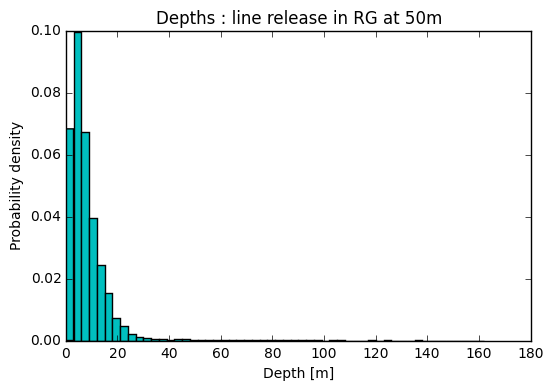

In [231]:
plot_hist(DEP_cross, np.arange(0, 164, 3), True, 'Depths : line release in RG at 50m', 'Depth [m]')

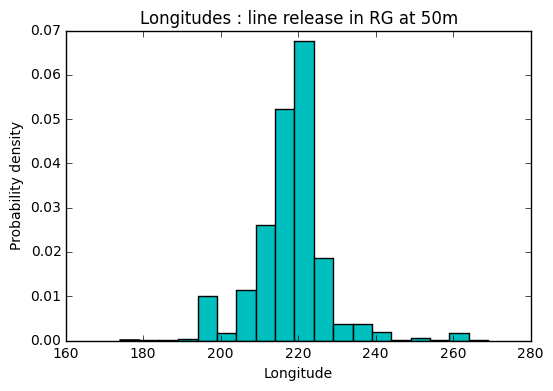

In [232]:
plot_hist(LON_cross, np.arange(174, 270, 5), True, 'Longitudes : line release in RG at 50m', 'Longitude')

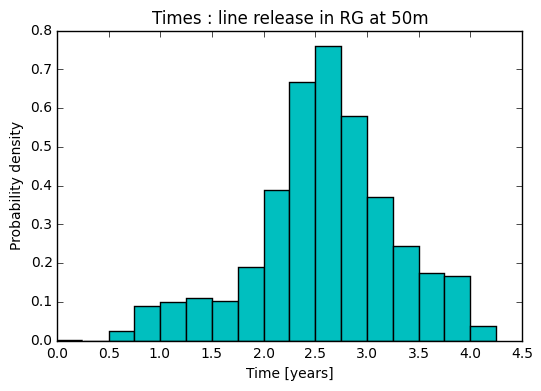

In [239]:
TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360 
plot_hist(TIME_cross_yr, np.arange(0, 4.3, 0.25), True, 'Times : line release in RG at 50m', 'Time [years]')

***

# Without threshold 

In [245]:
print 'Depth :'
print 'min :', np.array(DEP_cross).min()
print 'max :', np.array(DEP_cross).max()
print ''

print 'Longitude :'
print 'min :', np.array(LON_cross).min()
print 'max :', np.array(LON_cross).max()
print ''

TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360
print 'Time :'
print 'min :', np.array(TIME_cross_yr).min()
print 'max :', np.array(TIME_cross_yr).max()

Depth :
min : 0.0815111
max : 171.886

Longitude :
min : 175.082
max : 269.799

Time :
min : 0.388888888889
max : 4.08333333333


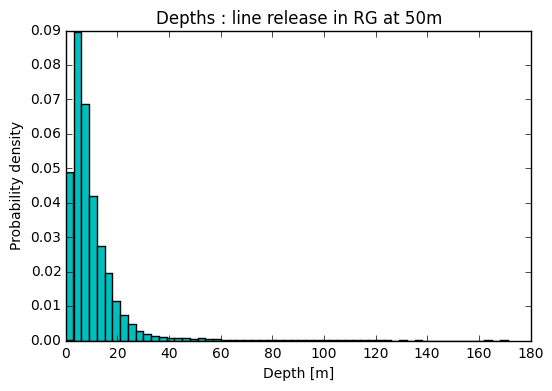

In [246]:
plot_hist(DEP_cross, np.arange(0, 172, 3), True, 'Depths : line release in RG at 50m', 'Depth [m]')

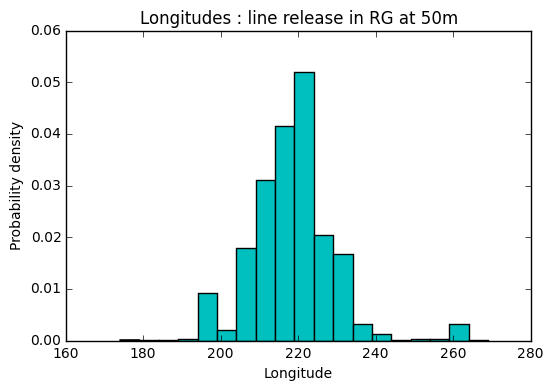

In [247]:
plot_hist(LON_cross, np.arange(174, 270, 5), True, 'Longitudes : line release in RG at 50m', 'Longitude')

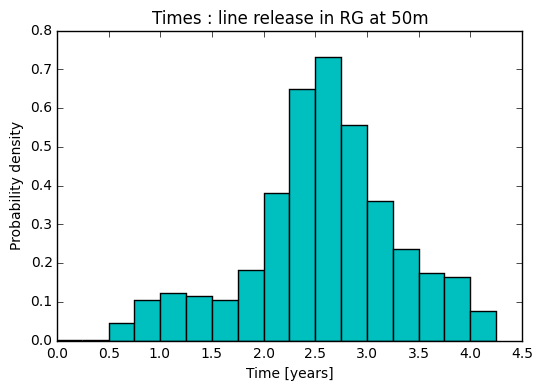

In [248]:
TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360 
plot_hist(TIME_cross_yr, np.arange(0, 4.3, 0.25), True, 'Times : line release in RG at 50m', 'Time [years]')

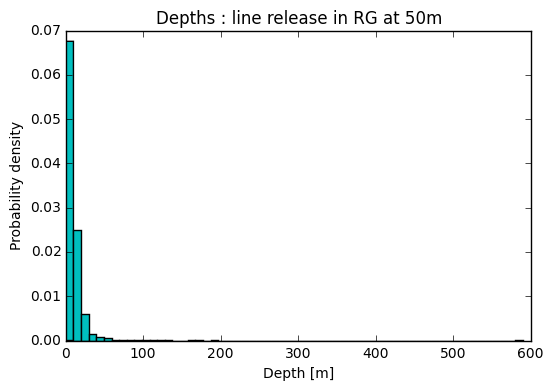

In [282]:
plot_hist(DEP_cross, 60, True, 'Depths : line release in RG at 50m', 'Depth [m]')

If needed !

<Container object of 20 artists>

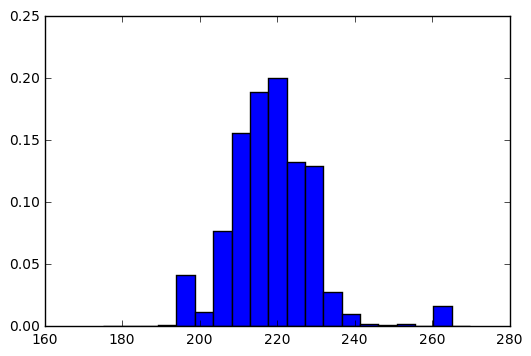

In [249]:
myarray = LON_cross
results, edges = np.histogram(myarray, bins=20, normed=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)

# Months of crossing

## This makes a list of 5yrs filled with the info on which month it is

In [250]:
MAY = []
JUL = []
AUG = []
OCT = []
DEC = []
JAN = []
MAR = []

for i in range(1,32):
    MAY.append('MAY')
    JUL.append('JUL')
    AUG.append('AUG')
    OCT.append('OCT')
    DEC.append('DEC')
    JAN.append('JAN')
    MAR.append('MAR')

In [251]:
JUN = []
SEP = []
NOV = []

for i in range(1,31):
    JUN.append('JUN')
    SEP.append('SEP')
    NOV.append('NOV')

In [252]:
FEV = []
for i in range(1,29):
    FEV.append('FEV')

In [253]:
beg_APR = []
end_APR = []

for i in range(1,6):
    beg_APR.append('APR')
    
for i in range(6,31):
    end_APR.append('APR')

In [254]:
Year = []
Year = [beg_APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC, JAN, FEV, MAR, end_APR]

In [255]:
Year_1_list = list(itertools.chain(*Year))

In [256]:
Five_Years = []
for i in range(5):
    Five_Years.append(Year_1_list)

In [257]:
Five_Years_1_list = list(itertools.chain(*Five_Years))

In [258]:
len(Five_Years_1_list)

1825

In [259]:
pickle_save('Five_Years_1_list', Path, Five_Years_1_list)

('saved at : ', '/data/ebent/Octopus/output/50m_line_RG/Five_Years_1_list.npy')


In [260]:
Five_Years_1_list = pickle_load('Five_Years_1_list', Path)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/Five_Years_1_list.npy')


## Searchs the month that correspond to the time in index

In [291]:
analysis = []
for i in range(len(TIME_cross)):
    analysis.append(Five_Years_1_list[np.array(TIME_cross[i])*10])

In [292]:
from collections import Counter

num = Counter(analysis)

In [293]:
x = list(num.values())
y = list(num.keys())

In [294]:
X = list(x)
Y = list(y)

In [295]:
for i in range(12):
    if y[i] == 'JAN':
        Y[0] = y[i]
        X[0] = x[i]
    if y[i] == 'FEV':
        Y[1] = y[i]
        X[1] = x[i]
    if y[i] == 'MAR':
        Y[2] = y[i]
        X[2] = x[i]
    if y[i] == 'APR':
        Y[3] = y[i]
        X[3] = x[i]
    if y[i] == 'MAY':
        Y[4] = y[i]
        X[4] = x[i]
    if y[i] == 'JUN':
        Y[5] = y[i]
        X[5] = x[i]
    if y[i] == 'JUL':
        Y[6] = y[i]
        X[6] = x[i]
    if y[i] == 'AUG':
        Y[7] = y[i]
        X[7] = x[i]
    if y[i] == 'SEP':
        Y[8] = y[i]
        X[8] = x[i]
    if y[i] == 'OCT':
        Y[9] = y[i]
        X[9] = x[i]
    if y[i] == 'NOV':
        Y[10] = y[i]
        X[10] = x[i]
    if y[i] == 'DEC':
        Y[11] = y[i]
        X[11] = x[i]

In [296]:
for i in range(12):
    print i, Y[i]

0 JAN
1 FEV
2 MAR
3 APR
4 MAY
5 JUN
6 JUL
7 AUG
8 SEP
9 OCT
10 NOV
11 DEC


# Without threshold

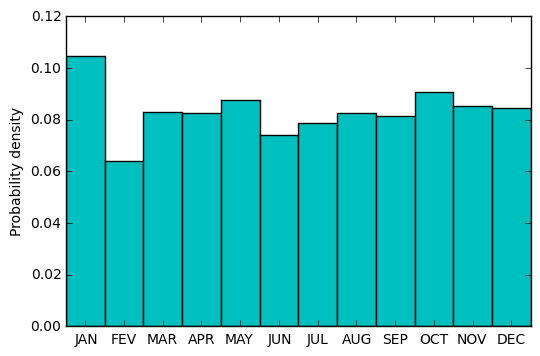

In [277]:
x_coordinates = np.arange(len(num.keys()))
plt.bar(x_coordinates, np.array(X)/float(len(TIME_cross)), width=1, color='c')
#plt.xticks(Y)
x_coordinates = np.arange(len(num.keys()))+0.5
plt.xticks(x_coordinates, Y)
plt.ylabel('Probability density')

# With threshold

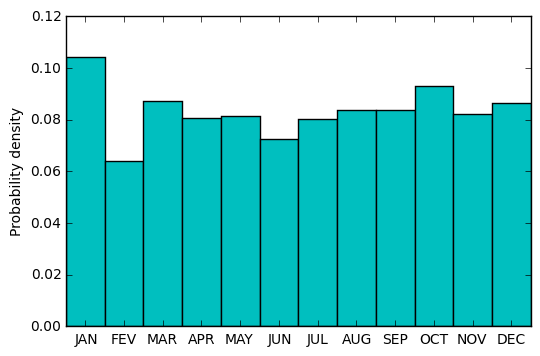

In [297]:
x_coordinates = np.arange(len(num.keys()))
plt.bar(x_coordinates, np.array(X)/float(len(TIME_cross)), width=1, color='c')
#plt.xticks(Y)
x_coordinates = np.arange(len(num.keys()))+0.5
plt.xticks(x_coordinates, Y)
plt.ylabel('Probability density')